In [99]:
# Importing libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv('D:\DATA ANALYTICS\project\movies.csv')

In [51]:
pd.set_option('display.max_rows', None)

In [100]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data cleaning

In [118]:
# Summing up missing data in each column

df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         0
star           0
country        0
budget      2171
gross        189
company        0
runtime        4
dtype: int64

In [4]:
# Data types for each columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Changing data type for budget and gross 

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [101]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
df['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [40]:
# Extracting YYYY from 'released' rows
df['released_year'] = df['released'].str.split('\s+').str[2]

In [102]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [61]:
# Drop duplicates

df['name'].drop_duplicates().sort_values(ascending=False)

4722                                             Æon Flux
4761                              xXx: State of the Union
7112                           xXx: Return of Xander Cage
4083                                                  xXx
3503                                             eXistenZ
5642                                               [Rec]²
166                                  Zorro: The Gay Blade
6863                                             Zootopia
180                                             Zoot Suit
4984                                                 Zoom
6962                                          Zoolander 2
3880                                            Zoolander
5931                                            Zookeeper
7489                               Zombieland: Double Tap
5456                                           Zombieland
6615                                           Zombeavers
5048                                               Zodiac
5926          

In [98]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [105]:
# Initial hypothesis: with gross
# 1) high correlation with score
# 2) high correlation with company
# 3) high correlation with star

### 1) Gross and Score correlation

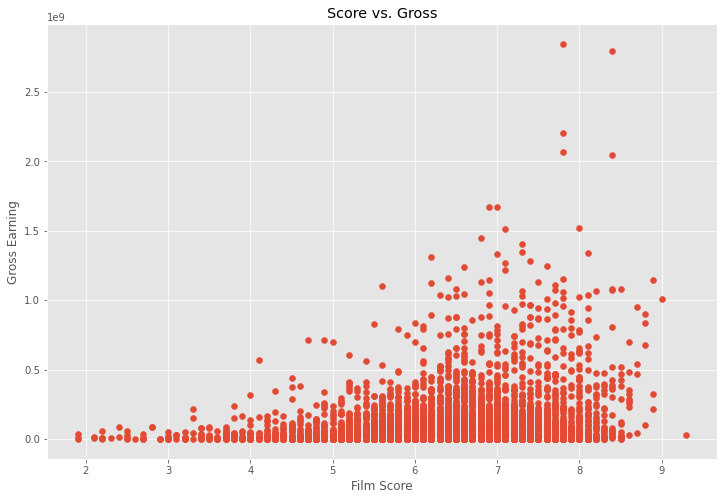

In [68]:
# Scatterplot correlation of Gross and Score

plt.scatter(x=df['score'], y=df['gross'])
plt.title('Score vs. Gross')
plt.xlabel('Film Score')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='score', ylabel='gross'>

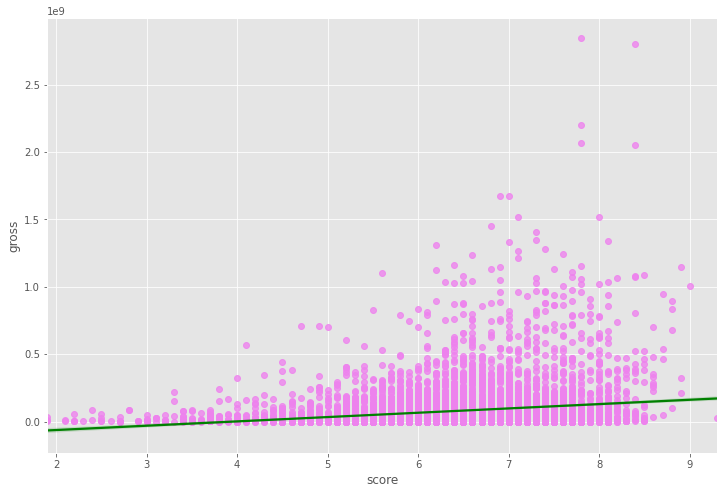

In [74]:
# Plotting linear regression of Score vs Gross

sns.regplot(x='score',y='gross',data=df, scatter_kws={"color":"violet"},line_kws={"color":"green"})

In [106]:
# Pearson correlation value between Gross and Score

df['gross'].corr(df['score'])

# Shows low correlation value. Hypothesis is not accepted, no significance.

0.186257811193638

### 2) Gross and Company correlation

In [109]:
# Categorizing non-numeric variables to unique value

df1 = df

for col_name in df1.columns:
    if (df1[col_name].dtype == 'object'):
        df1[col_name] = df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [107]:
# Checking with df1 to see if it tallies with the original df

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


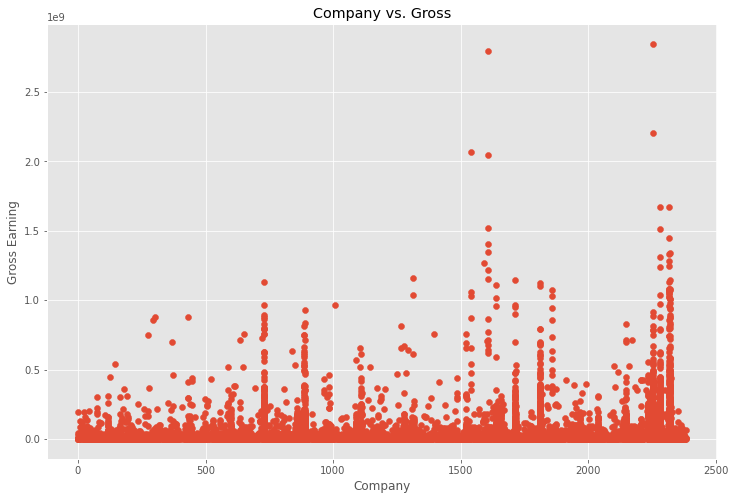

In [111]:
# Scatterplot correlation of Gross and Company

plt.scatter(x=df1['company'], y=df['gross'])
plt.title('Company vs. Gross')
plt.xlabel('Company')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='company', ylabel='gross'>

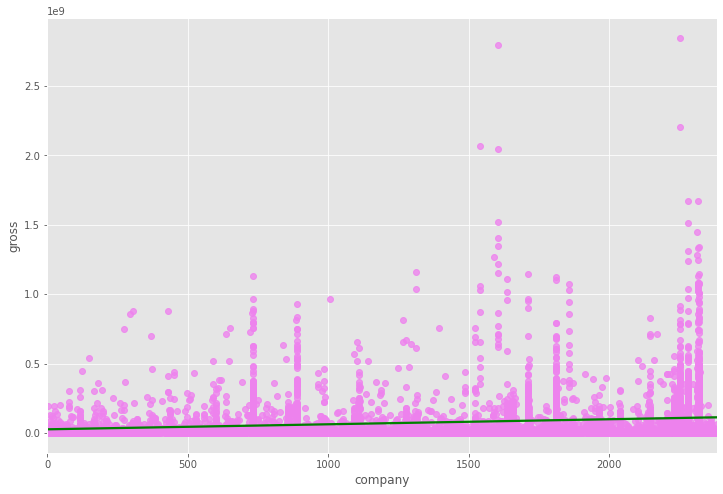

In [113]:
# Plotting linear regression of Company vs Gross

sns.regplot(x='company',y='gross',data=df1, scatter_kws={"color":"violet"},line_kws={"color":"green"})

In [115]:
# Pearson correlation value between Gross and Score

df1['gross'].corr(df['company'])

# Shows low correlation value. Hypothesis is not accepted, no significance.

0.15483961392729365

## Heatmap of Numeric variables only

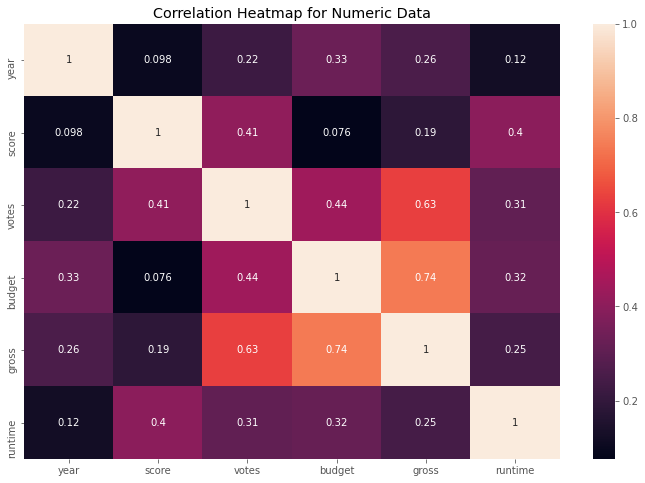

In [91]:
# Heatmap of numeric data

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap for Numeric Data')
plt.show()

## Heatmap of non-Numeric and numeric data type

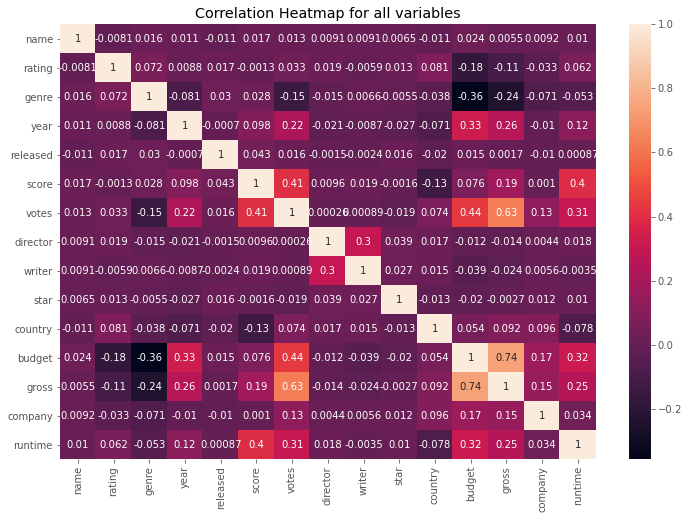

In [117]:
# Heatmap of non-numeric and numeric data

corr_matrix = df1.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap for all variables')
plt.show()

#### In conclusion, votes and budget has the highest correlation with Gross 